In [3]:
from sklearn import metrics
y_pred = [0, 1, 1, 1]
y_true = [0, 1, 0, 1]

print('precision: ', metrics.precision_score(y_true, y_pred))
print('recall: ', metrics.recall_score(y_true, y_pred))

precision:  0.6666666666666666
recall:  1.0


In [7]:
import numpy as np
# we have groud-truth relevance of some answers to a query:
true_relevance = np.asarray([[10, 0, 0, 1, 5]])


# we predict some scores (relevance) for the answers
scores = np.asarray([[.1, .2, .3, 4, 6]])
metrics.ndcg_score(true_relevance, scores)

0.6956940443813076

In [10]:
scores = np.asarray([[.133, 2.2, .3, 5.7, 6]])
metrics.ndcg_score(true_relevance, scores)

0.6956940443813076

In [25]:
# 在列表末尾补0，对NDCG的计算没有影响
true_relevance = np.asarray([[1, 1, 0, 1, 1, 0, 0]])
scores = np.asarray([[0.9, 0.8, 0.7, 0.6, 0.5, 0, 0]])
metrics.ndcg_score(true_relevance, scores)

0.9558295932317544

In [78]:
# 符合wikipedia的计算
# https://en.wikipedia.org/wiki/Discounted_cumulative_gain
true_relevance = np.asarray([[3, 2, 3, 0, 1, 2, 3, 2]])
scores = np.asarray([[0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]])
metrics.ndcg_score(true_relevance, scores, k=6)

0.7850023719699479

In [69]:
# 在列表末尾补0，对NDCG的计算没有影响
true_relevance = np.asarray([[0, 1, 1, 0, 1]])
scores = np.asarray([[0.9, 0.8, 0.7, 0.6, 0.5]])
metrics.ndcg_score(true_relevance, scores, k=90)

0.7122630665145961

In [90]:
# 列表的长度为1，会报错。
# 所以，当待评价的列表长度为1的时候，可以再补上0。
true_relevance = np.asarray([[1, 0]])
scores = np.asarray([[0.9,0]])
metrics.ndcg_score(true_relevance, scores, k=4)

1.0

In [ ]:
# 以jd_id聚类
# 对于每一个jd_id，找到对应的cv_id列表，进而找到cv_id列表对应的real_label和pred_score
# 将real_label和pred_score送入ndcg_score()


In [1]:
import pandas as pd

In [33]:
dfA = pd.DataFrame({'keycv': ['K0', 'K1', 'K2', 'K3', 'K4', 'K5', 'K0'],
                    'keyjd': ['K0', 'K1', 'K2', 'K3', 'K4', 'K5', 'K0'],
                   'A': ['A0', 'A1', 'A2', 'A3', 'A4', 'A5', 'A00']})
dfB = pd.DataFrame({'keycv': ['K1', 'K0', 'K2', 'K4', 'K3', 'K0'],
                    'keyjd': ['K1', 'K0', 'K2', 'K4', 'K3', 'K0'],
                   'B': ['B1', 'B0', 'B2', 'B4', 'B3', 'B00']})
dfA.sort_values(by='A')
dfB.sort_values(by='B')
dfA.join(dfB.set_index(['keycv', 'keyjd']), on=['keycv', 'keyjd']).sort_values(by='A')

,keycv,keyjd,A,B
0,K0,K0,A0,B0
0,K0,K0,A0,B00
6,K0,K0,A00,B0
6,K0,K0,A00,B00
1,K1,K1,A1,B1
2,K2,K2,A2,B2
3,K3,K3,A3,B3
4,K4,K4,A4,B4
5,K5,K5,A5,NaN


In [27]:
from math import nan
import numpy as np
df = pd.DataFrame({
    'brand': ['Yum Yum', 'Yum Yum', 'Indomie', 'Indomie', 'Indomie'],
    'style': ['cup', 'cup', 'cup', 'pack', np.nan],
    'rating': [4, 4.1, 3.5, 15, np.nan]
})
df

,brand,style,rating
0,Yum Yum,cup,4.0
1,Yum Yum,cup,4.1
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,NaN,NaN


In [28]:
# loc
for i in range(len(df)):
    rating = df.loc[i, 'rating']
    if pd.isnull(rating):
        df.loc[i, 'rating'] = 10000
    print(df.loc[i, 'rating'])

df

4.0
4.1
3.5
15.0
10000.0


,brand,style,rating
0,Yum Yum,cup,4.0
1,Yum Yum,cup,4.1
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,NaN,10000.0


In [11]:
df.drop_duplicates(subset=['brand', 'rating'], keep='first')

,brand,style,rating
0,Yum Yum,cup,4.0
1,Yum Yum,cup,4.1
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


In [22]:
# 初步怀疑这里的feature的cvid和jdid有重复
base_path = '../data_20220831/'
raw_feature_file = 'sample_raw_feature_20220831.csv'
ext_feature_file = 'sample_ext_feature_20220831.csv'
new_feature_file = 'sample_new_feature_20220831.csv'

# 去重
raw_feature = pd.read_csv(base_path + raw_feature_file).drop('Unnamed: 0', axis=1).drop_duplicates(subset=['cv_id', 'jd_id'], keep='first')
ext_feature = pd.read_csv(base_path + ext_feature_file).drop('Unnamed: 0', axis=1).drop_duplicates(subset=['cv_id', 'jd_id'], keep='first')
new_feature = pd.read_csv(base_path + new_feature_file).drop('Unnamed: 0', axis=1).drop_duplicates(subset=['cv_id', 'jd_id'], keep='first')

In [23]:
raw_feature

,cv_id,jd_id,age,recruit_number,workYear,min_month_salary,max_month_salary,pay_months
0,2c9207157bf91042017c0d2beef00470,2c9207157bcbb76b017bcde2b46d04cd,36.0,1,13.0,NaN,NaN,NaN
1,2c9207157bf91042017c0d979cbb047d,2c9207157bcbb76b017bf7f2bbbb3153,29.0,1,7.0,NaN,NaN,NaN
2,2c9207157bf91042017c7232fbab3be1,2c9207157bf94d99017c108f769405e0,NaN,1,14.0,NaN,NaN,NaN
3,2c9207157d308592017d4a94cb1113a1,2c9207157d2f0ec5017d5a9265ba33d9,27.0,1,3.0,NaN,NaN,NaN
4,2c9207157dabb0a3017dbca16cdf4c26,2c9207157d631abb017d6eed1c79139f,28.0,1,5.0,25.0,45.0,12.0
...,...,...,...,...,...,...,...,...
83296,8a69f60582c8626e0182c9fc367050e6,8a69c4df82b081d30182c391c1f51bfc,31.0,1,11.0,30.0,40.0,12.0
83297,8a69f60582c8626e0182cedb7ca86dc8,8a69c47b82b07fdc0182b3dcd51b7a71,36.0,5,14.0,15.0,30.0,12.0
83298,8a69f61382b080760182c37a984f3a9a,2c92071580dd3ab70180f18714e119c0,27.0,30,5.0,15.0,30.0,14.0
83299,8a69f64782e59cc90182f37791dc6649,8a69d77e82926b410182b011869b3b74,43.0,1,16.0,30.0,50.0,13.0


In [24]:
ext_feature

,cv_id,jd_id,school_labels_cv,school_labels_jd,expectlocation_range_cv,location_range_jd,degree_index_cv,degree_index_jd,workyear_range_jd,gender_index_cv,job_intentstatus_cv
0,2c9207157bcb9549017bce3ea49b00fa,2c9207157bcbb76b017bce3d99ba059a,[],[],['未知市'],['深圳市'],5,5,"[5, 10]",0,3
1,2c9207157bf91042017c1040330d04d3,2c9207157bcbb76b017bec76efca1ca5,[],[],['北京市'],['长沙市'],6,5,"[10, 100]",0,3
2,2c9207157bf91042017c10f871d309f4,2c9207157f347800017f624770866105,"['985', '211', '双一流', 'qs100']",[],['北京市'],[],6,7,"[0, 1]",0,3
3,2c9207157bf91042017c62fce2583411,2c9207157b9b9199017bca11fd3d3f11,[],[],['未知市'],['杭州市'],5,5,"[5, 10]",1,3
4,2c9207157bf91042017c6ecc163d3aa8,2c9207157bf94d99017c6ecb294930b1,"['985', '211', '双一流']",[],['未知市'],['深圳市'],5,5,"[5, 10]",0,3
...,...,...,...,...,...,...,...,...,...,...,...
83296,8a69d7c28219945301823a12e0266463,8a69c4df82b081d30182c9ec1ecd1c67,[],[],['深圳市'],[],5,3,"[3, 5]",0,3
83297,8a69d7c282199453018246ebf6b60643,8a69f67f82198d89018234adfcd91510,[],[],['上海市'],[],5,3,"[1, 3]",0,2
83298,8a69d7c282199453018247bb00cb68a3,8a69c468826ee9b40182831bedfc5e79,"['985', '211', '双一流', 'qs100']",[],['上海市'],[],6,5,"[10, 100]",0,2
83299,8a69d7c282199453018247bb00cb68a3,8a69f6f8823a93b9018247c30aca4e3d,"['985', '211', '双一流', 'qs100']",['不限'],['上海市'],[],6,5,"[10, 100]",0,2


In [25]:
new_feature

,cv_id,jd_id,description_tfidf_pca,position_tfidf_pca,requirement_tfidf_pca,kills_tfidf_pca,title_category_tags_tfidf_pca,work_duration_mean,equal_job,parsed_desiredSalary,parsed_currentSalary
0,2c9207157bf91042017c0d2beef00470,2c9207157bcbb76b017bcde2b46d04cd,"[-0.2028268203396756, 0.052902330097395, 0.064...","[-0.0393549614722772, -0.1145062990375059, -0....","[-0.0885833919216516, 0.1251912920110739, -0.0...","[0.332299671725948, 0.1661089355047844, 0.1869...","[-0.0428931610734227, -0.1624195901085068, 0.0...",1209.500000,3,-1,-1
1,2c9207157bf91042017c0d979cbb047d,2c9207157bcbb76b017bf7f2bbbb3153,"[-0.0930831222487631, 0.0519592769164767, -0.1...","[0.1053468947433308, -0.0266945757513419, -0.0...","[-0.0801264640475711, 0.122717540913069, -0.01...","[0.2361554447739323, 0.1126566470966733, -0.24...","[-0.2347225490786922, 0.0825676460870139, 0.23...",506.000000,4,-1,-1
2,2c9207157bf91042017c7232fbab3be1,2c9207157bf94d99017c108f769405e0,"[-0.077256404167103, -0.195452028548207, -0.22...","[-0.0368041780176452, -0.0857596688737137, -0....","[-0.0644508985020475, 0.1611090469848189, -0.0...","[-0.0922030791609062, -0.1406030646715831, -0....","[-0.1959575316104875, 0.2008839134718935, -0.3...",811.500000,0,-1,-1
3,2c9207157d308592017d4a94cb1113a1,2c9207157d2f0ec5017d5a9265ba33d9,"[-0.0933581483833488, 0.0982068787794115, -0.0...","[0.0490471624206398, -0.0409758387316529, -0.0...","[-0.1339726610662708, -0.1761763831994133, 0.0...","[0.1429396280466366, 0.0217622310718796, -0.14...","[-0.3678224323290787, 0.1854520957699004, 0.32...",76.500000,3,-1,-1
4,2c9207157dabb0a3017dbca16cdf4c26,2c9207157d631abb017d6eed1c79139f,"[0.0391819610653473, -0.0287343543993758, 0.06...","[-0.0276426492329401, -0.111924304908804, -0.0...","[-0.0136365894358371, -0.0993886855789762, -0....","[-0.1003025481350853, -0.1495209206927971, -0....","[0.0062176220898476, -0.055003735259901, -0.00...",1034.000000,1,450,-1
...,...,...,...,...,...,...,...,...,...,...,...
83296,8a69f60582c8626e0182c9fc367050e6,8a69c4df82b081d30182c391c1f51bfc,"[-0.1614955741689255, 0.0982571120950793, 0.02...","[-0.0025833865349725, -0.2508193885760124, 0.0...","[-0.1517178304086961, -0.1846200489563693, 0.1...","[0.3241805444120278, -0.0345988526341208, 0.26...","[-0.0954686272882023, -0.0493724436404325, 0.1...",1268.000000,4,-1,-1
83297,8a69f60582c8626e0182cedb7ca86dc8,8a69c47b82b07fdc0182b3dcd51b7a71,"[-0.187368032369494, 0.0815596725923325, 0.018...","[0.1067952861660345, -0.225099081085894, -0.06...","[-0.1015761687785662, 0.0302194323476557, 0.04...","[0.0106236588110783, -0.1609745502874504, -0.0...","[-0.1288286036514234, -0.3332390781216969, 0.0...",1583.333333,3,120,120
83298,8a69f61382b080760182c37a984f3a9a,2c92071580dd3ab70180f18714e119c0,"[0.4185259318945861, -0.0453746812279699, 0.39...","[-0.4597675655720933, 0.5738247473834591, 0.33...","[0.5440054441064249, -0.080866345740466, 0.135...","[-0.2612896440159119, 0.0846500996922437, 0.11...","[0.5515111960481315, 0.4001609626530521, 0.169...",487.000000,5,300,216
83299,8a69f64782e59cc90182f37791dc6649,8a69d77e82926b410182b011869b3b74,"[-0.0823327926841566, -0.2134441983861008, -0....","[-0.0126004164756376, -0.1818836719727035, -0....","[-0.0904644960948339, 0.3290683312687502, -0.0...","[0.079180668535461, -0.141120307479467, 0.0457...","[0.0103941678651557, -0.0621128773282237, -0.0...",968.666667,1,900,900


In [26]:
medium = raw_feature.join(ext_feature.set_index(['cv_id', 'jd_id']), on=['cv_id', 'jd_id'], how='inner')
raw_ext_new_feature = medium.join(new_feature.set_index(['cv_id', 'jd_id']), on=['cv_id', 'jd_id'], how='inner')
raw_ext_new_feature

,cv_id,jd_id,age,recruit_number,workYear,min_month_salary,max_month_salary,pay_months,school_labels_cv,school_labels_jd,...,job_intentstatus_cv,description_tfidf_pca,position_tfidf_pca,requirement_tfidf_pca,kills_tfidf_pca,title_category_tags_tfidf_pca,work_duration_mean,equal_job,parsed_desiredSalary,parsed_currentSalary
0,2c9207157bf91042017c0d2beef00470,2c9207157bcbb76b017bcde2b46d04cd,36.0,1,13.0,NaN,NaN,NaN,[],[],...,3,"[-0.2028268203396756, 0.052902330097395, 0.064...","[-0.0393549614722772, -0.1145062990375059, -0....","[-0.0885833919216516, 0.1251912920110739, -0.0...","[0.332299671725948, 0.1661089355047844, 0.1869...","[-0.0428931610734227, -0.1624195901085068, 0.0...",1209.500000,3,-1,-1
1,2c9207157bf91042017c0d979cbb047d,2c9207157bcbb76b017bf7f2bbbb3153,29.0,1,7.0,NaN,NaN,NaN,[],[],...,2,"[-0.0930831222487631, 0.0519592769164767, -0.1...","[0.1053468947433308, -0.0266945757513419, -0.0...","[-0.0801264640475711, 0.122717540913069, -0.01...","[0.2361554447739323, 0.1126566470966733, -0.24...","[-0.2347225490786922, 0.0825676460870139, 0.23...",506.000000,4,-1,-1
2,2c9207157bf91042017c7232fbab3be1,2c9207157bf94d99017c108f769405e0,NaN,1,14.0,NaN,NaN,NaN,[],[],...,3,"[-0.077256404167103, -0.195452028548207, -0.22...","[-0.0368041780176452, -0.0857596688737137, -0....","[-0.0644508985020475, 0.1611090469848189, -0.0...","[-0.0922030791609062, -0.1406030646715831, -0....","[-0.1959575316104875, 0.2008839134718935, -0.3...",811.500000,0,-1,-1
3,2c9207157d308592017d4a94cb1113a1,2c9207157d2f0ec5017d5a9265ba33d9,27.0,1,3.0,NaN,NaN,NaN,"['211', '双一流']",[],...,3,"[-0.0933581483833488, 0.0982068787794115, -0.0...","[0.0490471624206398, -0.0409758387316529, -0.0...","[-0.1339726610662708, -0.1761763831994133, 0.0...","[0.1429396280466366, 0.0217622310718796, -0.14...","[-0.3678224323290787, 0.1854520957699004, 0.32...",76.500000,3,-1,-1
4,2c9207157dabb0a3017dbca16cdf4c26,2c9207157d631abb017d6eed1c79139f,28.0,1,5.0,25.0,45.0,12.0,"['211', '双一流']",[],...,3,"[0.0391819610653473, -0.0287343543993758, 0.06...","[-0.0276426492329401, -0.111924304908804, -0.0...","[-0.0136365894358371, -0.0993886855789762, -0....","[-0.1003025481350853, -0.1495209206927971, -0....","[0.0062176220898476, -0.055003735259901, -0.00...",1034.000000,1,450,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83296,8a69f60582c8626e0182c9fc367050e6,8a69c4df82b081d30182c391c1f51bfc,31.0,1,11.0,30.0,40.0,12.0,[],[],...,0,"[-0.1614955741689255, 0.0982571120950793, 0.02...","[-0.0025833865349725, -0.2508193885760124, 0.0...","[-0.1517178304086961, -0.1846200489563693, 0.1...","[0.3241805444120278, -0.0345988526341208, 0.26...","[-0.0954686272882023, -0.0493724436404325, 0.1...",1268.000000,4,-1,-1
83297,8a69f60582c8626e0182cedb7ca86dc8,8a69c47b82b07fdc0182b3dcd51b7a71,36.0,5,14.0,15.0,30.0,12.0,[],[],...,3,"[-0.187368032369494, 0.0815596725923325, 0.018...","[0.1067952861660345, -0.225099081085894, -0.06...","[-0.1015761687785662, 0.0302194323476557, 0.04...","[0.0106236588110783, -0.1609745502874504, -0.0...","[-0.1288286036514234, -0.3332390781216969, 0.0...",1583.333333,3,120,120
83298,8a69f61382b080760182c37a984f3a9a,2c92071580dd3ab70180f18714e119c0,27.0,30,5.0,15.0,30.0,14.0,[],[],...,0,"[0.4185259318945861, -0.0453746812279699, 0.39...","[-0.4597675655720933, 0.5738247473834591, 0.33...","[0.5440054441064249, -0.080866345740466, 0.135...","[-0.2612896440159119, 0.0846500996922437, 0.11...","[0.5515111960481315, 0.4001609626530521, 0.169...",487.000000,5,300,216
83299,8a69f64782e59cc90182f37791dc6649,8a69d77e82926b410182b011869b3b74,43.0,1,16.0,30.0,50.0,13.0,[],[],...,3,"[-0.0823327926841566, -0.2134441983861008, -0....","[-0.0126004164756376, -0.1818836719727035, -0....","[-0.0904644960948339, 0.3290683312687502, -0.0...","[0.079180668535461, -0.141120307479467, 0.0457...","[0.0103941678651557, -0.0621128773282237, -0.0...",968.666667,1,900,900


In [31]:
all_sample = pd.read_csv('../data_20220831/sample_20220831_spark.csv').drop('Unnamed: 0', axis=1).drop_duplicates(subset=['cv_id', 'jd_id'], keep='first')
all_sample

/var/folders/99/wft1658s2mv39cv4wj_rcpqh0000gp/T/ipykernel_50430/2448397297.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  all_sample = pd.read_csv('../data_20220831/sample_20220831_spark.csv').drop('Unnamed: 0', axis=1).drop_duplicates(subset=['cv_id', 'jd_id'], keep='first')


,cv_id,jd_id,cv_code,jd_code,last_opt,da_label,rank_label,title,deadline,category_id,...,industry_cut,industry_jd2vec,industry_vec2,majorName_cut,majorName_jd2vec,majorName_vec2,skills_cut,skills_jd2vec,skills_vec2,ds
0,2c9207157bcb9549017bce3ea49b00fa,2c9207157bcbb76b017bce3d99ba059a,C972256920524165184,JD20210910134407574550,drop,1,1,市场策划总监,2021-11-30 23:59:59.0,140404,...,"['#', 'null']","[-0.009751920588314533, 0.17647229135036469, -...","[0.20024815201759338, 0.30229872465133667, -0....","['舞蹈', '学']","[0.2290763258934021, -0.14894524216651917, 0.0...","[-0.033116504549980164, -0.058041930198669434,...","['[', '""', 'Ai', '""', ',', '""', 'Ar', '""', ','...","[0.37405160069465637, 0.08108291774988174, -0....","[0.18812726438045502, -0.014001657254993916, -...",20220831
1,2c9207157bf91042017c1040330d04d3,2c9207157bcbb76b017bec76efca1ca5,C972256920532553817,JD20210916103438584949,link,-1,1,解决方案总监/经理,2021-10-31 23:59:59.0,101201,...,"['通信', '技术', '提供商']","[0.18720732629299164, -0.24131253361701965, -0...","[0.768592119216919, -0.16999222338199615, -0.4...",['计算机技术'],"[0.06550661474466324, -0.30920350551605225, -0...","[0.00835432019084692, -0.6533162593841553, -0....","['[', '""', 'it', '规划', '咨询', '""', ',', '""', '云...","[0.32306215167045593, 0.09080911427736282, -0....","[0.5299833416938782, -0.1909421980381012, -0.2...",20220831
2,2c9207157bf91042017c10f871d309f4,2c9207157f347800017f624770866105,C972256920545136700,JD20220216104801688663,drop,1,1,医学博士投资人,NaN,180101,...,"['基金', '/', '证券', '/', '期货', '/', '投资']","[0.022260336205363274, -0.03374471887946129, -...","[0.30257120728492737, -0.31254786252975464, -0...","['生物医学', '工程']","[0.01792692393064499, -0.1300506740808487, -0....","[0.005150213837623596, 0.15490269660949707, -0...","['[', '""', 'VC', '""', ',', '""', 'PPT', '""', ',...","[0.3084435760974884, 0.07542910426855087, -0.2...","[0.09389838576316833, 0.04999205097556114, -0....",20220831
3,2c9207157bf91042017c62fce2583411,2c9207157b9b9199017bca11fd3d3f11,C972256920557719589,JD20210908152800055103,reject,2,2,高级用户运营专家,2021-12-31 23:59:59.0,130405,...,"['#', 'null']","[-0.009751920588314533, 0.17647229135036469, -...","[0.20024815201759338, 0.30229872465133667, -0....",['市场营销'],"[0.6256594657897949, -0.07856443524360657, 0.0...","[0.7786060571670532, -0.8168095946311951, -0.6...","['[', '""', 'Vi', '""', ',', '""', 'Pr', '""', ','...","[0.3983086943626404, 0.11806842684745789, -0.2...","[0.29188045859336853, -0.04354493319988251, -0...",20220831
4,2c9207157bf91042017c6ecc163d3aa8,2c9207157bf94d99017c6ecb294930b1,C972256920557719638,JD20211011173942648108,accept,3,3,咨询总监,2021-10-31 23:59:59.0,260401,...,"['#', 'null']","[-0.009751920588314533, 0.17647229135036469, -...","[0.20024815201759338, 0.30229872465133667, -0....",['金融学'],"[0.11331989616155624, -0.1490677297115326, -0....","[-0.3050949275493622, -0.4833742380142212, -2....","['[', '""', 'PPT', '""', ',', '""', 'Word', '""', ...","[0.4078637957572937, 0.07882367819547653, -0.2...","[0.1595805436372757, -0.0552152618765831, -0.3...",20220831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83296,8a69d7c28219945301823a12e0266463,8a69c4df82b081d30182c9ec1ecd1c67,C1001558237016887296,JD20220823165719130900,link,-1,1,声学工程师,NaN,100801,...,"['#', 'null']","[-0.009751920588314533, 0.17647229135036469, -...","[0.20024815201759338, 0.30229872465133667, -0....","['韩国', '永进', '大学']","[-0.016853807494044304, -0.16189433634281158, ...","[0.4639318585395813, 0.4096287488937378, 0.103...","['CAD', ',', 'Proe', ',', 'Ansys', ',', '优化', ...","[0.29724088311195374, -0.06454341858625412, -0...","[-0.07170484960079193, 0.2823019027709961, -0....",20220831
83297,8a69d7c282199453018246ebf6b60643,8a69f67f82198d89018234adfcd91510,C1002462334712680448,JD20220725172633862905,post,-1,2,销售代表,NaN,140301,...,"['#', 'null']","[-0.009751920588314533, 0.17647229135036469, -...","[0.20024815201759338, 0.30229872465133667, -0....","['河南', '科技', '大学']","[0.4

In [32]:
label_df = all_sample[['cv_id', 'jd_id', 'da_label', 'rank_label']]
raw_ext_new_feature_label = raw_ext_new_feature.join(label_df.set_index(['cv_id', 'jd_id']), on=['cv_id', 'jd_id'], how='inner')
raw_ext_new_feature_label
#raw_ext_new_feature_label.to_csv('../data_20220831/raw_ext_new_feature_label.csv')

,cv_id,jd_id,age,recruit_number,workYear,min_month_salary,max_month_salary,pay_months,school_labels_cv,school_labels_jd,...,position_tfidf_pca,requirement_tfidf_pca,kills_tfidf_pca,title_category_tags_tfidf_pca,work_duration_mean,equal_job,parsed_desiredSalary,parsed_currentSalary,da_label,rank_label
0,2c9207157bf91042017c0d2beef00470,2c9207157bcbb76b017bcde2b46d04cd,36.0,1,13.0,NaN,NaN,NaN,[],[],...,"[-0.0393549614722772, -0.1145062990375059, -0....","[-0.0885833919216516, 0.1251912920110739, -0.0...","[0.332299671725948, 0.1661089355047844, 0.1869...","[-0.0428931610734227, -0.1624195901085068, 0.0...",1209.500000,3,-1,-1,3,3
1,2c9207157bf91042017c0d979cbb047d,2c9207157bcbb76b017bf7f2bbbb3153,29.0,1,7.0,NaN,NaN,NaN,[],[],...,"[0.1053468947433308, -0.0266945757513419, -0.0...","[-0.0801264640475711, 0.122717540913069, -0.01...","[0.2361554447739323, 0.1126566470966733, -0.24...","[-0.2347225490786922, 0.0825676460870139, 0.23...",506.000000,4,-1,-1,1,1
2,2c9207157bf91042017c7232fbab3be1,2c9207157bf94d99017c108f769405e0,NaN,1,14.0,NaN,NaN,NaN,[],[],...,"[-0.0368041780176452, -0.0857596688737137, -0....","[-0.0644508985020475, 0.1611090469848189, -0.0...","[-0.0922030791609062, -0.1406030646715831, -0....","[-0.1959575316104875, 0.2008839134718935, -0.3...",811.500000,0,-1,-1,2,2
3,2c9207157d308592017d4a94cb1113a1,2c9207157d2f0ec5017d5a9265ba33d9,27.0,1,3.0,NaN,NaN,NaN,"['211', '双一流']",[],...,"[0.0490471624206398, -0.0409758387316529, -0.0...","[-0.1339726610662708, -0.1761763831994133, 0.0...","[0.1429396280466366, 0.0217622310718796, -0.14...","[-0.3678224323290787, 0.1854520957699004, 0.32...",76.500000,3,-1,-1,-1,2
4,2c9207157dabb0a3017dbca16cdf4c26,2c9207157d631abb017d6eed1c79139f,28.0,1,5.0,25.0,45.0,12.0,"['211', '双一流']",[],...,"[-0.0276426492329401, -0.111924304908804, -0.0...","[-0.0136365894358371, -0.0993886855789762, -0....","[-0.1003025481350853, -0.1495209206927971, -0....","[0.0062176220898476, -0.055003735259901, -0.00...",1034.000000,1,450,-1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83296,8a69f60582c8626e0182c9fc367050e6,8a69c4df82b081d30182c391c1f51bfc,31.0,1,11.0,30.0,40.0,12.0,[],[],...,"[-0.0025833865349725, -0.2508193885760124, 0.0...","[-0.1517178304086961, -0.1846200489563693, 0.1...","[0.3241805444120278, -0.0345988526341208, 0.26...","[-0.0954686272882023, -0.0493724436404325, 0.1...",1268.000000,4,-1,-1,3,3
83297,8a69f60582c8626e0182cedb7ca86dc8,8a69c47b82b07fdc0182b3dcd51b7a71,36.0,5,14.0,15.0,30.0,12.0,[],[],...,"[0.1067952861660345, -0.225099081085894, -0.06...","[-0.1015761687785662, 0.0302194323476557, 0.04...","[0.0106236588110783, -0.1609745502874504, -0.0...","[-0.1288286036514234, -0.3332390781216969, 0.0...",1583.333333,3,120,120,3,3
83298,8a69f61382b080760182c37a984f3a9a,2c92071580dd3ab70180f18714e119c0,27.0,30,5.0,15.0,30.0,14.0,[],[],...,"[-0.4597675655720933, 0.5738247473834591, 0.33...","[0.5440054441064249, -0.080866345740466, 0.135...","[-0.2612896440159119, 0.0846500996922437, 0.11...","[0.5515111960481315, 0.4001609626530521, 0.169...",487.000000,5,300,216,1,1
83299,8a69f64782e59cc90182f37791dc6649,8a69d77e82926b410182b011869b3b74,43.0,1,16.0,30.0,50.0,13.0,[],[],...,"[-0.0126004164756376, -0.1818836719727035, -0....","[-0.0904644960948339, 0.3290683312687502, -0.0...","[0.079180668535461, -0.141120307479467, 0.0457...","[0.0103941678651557, -0.0621128773282237, -0.0...",968.666667,1,900,900,-1,2


In [6]:
import pandas as pd
df = pd.read_csv('../data_20220831/raw_ext_new_feature_label_resume_type.csv').drop('Unnamed: 0', axis=1)
df

,cv_id,jd_id,age,recruit_number,workYear,min_month_salary,max_month_salary,pay_months,school_labels_cv,school_labels_jd,...,requirement_tfidf_pca,kills_tfidf_pca,title_category_tags_tfidf_pca,work_duration_mean,equal_job,parsed_desiredSalary,parsed_currentSalary,da_label,rank_label,resume_type
0,2c9207157bf91042017c0d2beef00470,2c9207157bcbb76b017bcde2b46d04cd,36.0,1,13.0,NaN,NaN,NaN,[],[],...,"[-0.0885833919216516, 0.1251912920110739, -0.0...","[0.332299671725948, 0.1661089355047844, 0.1869...","[-0.0428931610734227, -0.1624195901085068, 0.0...",1209.500000,3,-1,-1,3,3,NaN
1,2c9207157bf91042017c0d979cbb047d,2c9207157bcbb76b017bf7f2bbbb3153,29.0,1,7.0,NaN,NaN,NaN,[],[],...,"[-0.0801264640475711, 0.122717540913069, -0.01...","[0.2361554447739323, 0.1126566470966733, -0.24...","[-0.2347225490786922, 0.0825676460870139, 0.23...",506.000000,4,-1,-1,1,1,NaN
2,2c9207157bf91042017c7232fbab3be1,2c9207157bf94d99017c108f769405e0,NaN,1,14.0,NaN,NaN,NaN,[],[],...,"[-0.0644508985020475, 0.1611090469848189, -0.0...","[-0.0922030791609062, -0.1406030646715831, -0....","[-0.1959575316104875, 0.2008839134718935, -0.3...",811.500000,0,-1,-1,2,2,NaN
3,2c9207157d308592017d4a94cb1113a1,2c9207157d2f0ec5017d5a9265ba33d9,27.0,1,3.0,NaN,NaN,NaN,"['211', '双一流']",[],...,"[-0.1339726610662708, -0.1761763831994133, 0.0...","[0.1429396280466366, 0.0217622310718796, -0.14...","[-0.3678224323290787, 0.1854520957699004, 0.32...",76.500000,3,-1,-1,-1,2,4.0
4,2c9207157dabb0a3017dbca16cdf4c26,2c9207157d631abb017d6eed1c79139f,28.0,1,5.0,25.0,45.0,12.0,"['211', '双一流']",[],...,"[-0.0136365894358371, -0.0993886855789762, -0....","[-0.1003025481350853, -0.1495209206927971, -0....","[0.0062176220898476, -0.055003735259901, -0.00...",1034.000000,1,450,-1,1,1,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82328,8a69f60582c8626e0182c9fc367050e6,8a69c4df82b081d30182c391c1f51bfc,31.0,1,11.0,30.0,40.0,12.0,[],[],...,"[-0.1517178304086961, -0.1846200489563693, 0.1...","[0.3241805444120278, -0.0345988526341208, 0.26...","[-0.0954686272882023, -0.0493724436404325, 0.1...",1268.000000,4,-1,-1,3,3,4.0
82329,8a69f60582c8626e0182cedb7ca86dc8,8a69c47b82b07fdc0182b3dcd51b7a71,36.0,5,14.0,15.0,30.0,12.0,[],[],...,"[-0.1015761687785662, 0.0302194323476557, 0.04...","[0.0106236588110783, -0.1609745502874504, -0.0...","[-0.1288286036514234, -0.3332390781216969, 0.0...",1583.333333,3,120,120,3,3,4.0
82330,8a69f61382b080760182c37a984f3a9a,2c92071580dd3ab70180f18714e119c0,27.0,30,5.0,15.0,30.0,14.0,[],[],...,"[0.5440054441064249, -0.080866345740466, 0.135...","[-0.2612896440159119, 0.0846500996922437, 0.11...","[0.5515111960481315, 0.4001609626530521, 0.169...",487.000000,5,300,216,1,1,4.0
82331,8a69f64782e59cc90182f37791dc6649,8a69d77e82926b410182b011869b3b74,43.0,1,16.0,30.0,50.0,13.0,[],[],...,"[-0.0904644960948339, 0.3290683312687502, -0.0...","[0.079180668535461, -0.141120307479467, 0.0457...","[0.0103941678651557, -0.0621128773282237, -0.0...",968.666667,1,900,900,-1,2,4.0


# 缺失值填充test

In [30]:
from sklearn.impute import SimpleImputer


In [33]:
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit([[1, 2], [np.nan, 3], [7, 6]])
# 有一个重要的假设：fit和transform的数据分布是一致的
X = [[np.nan, 2], [6, np.nan], [7, 6]]
print(imp.transform(X))

[[4.         2.        ]
 [6.         3.66666667]
 [7.         6.        ]]


In [34]:
import scipy.sparse as sp
X = sp.csc_matrix([[1, 2], [0, -1], [8, 4]])
# 可以指定缺失值
imp = SimpleImputer(missing_values=-1, strategy='mean')
imp.fit(X)

X_test = sp.csc_matrix([[-1, 2], [6, -1], [7, 6]])
print(imp.transform(X_test).toarray())

[[3. 2.]
 [6. 3.]
 [7. 6.]]


In [29]:
import pandas as pd
df = pd.DataFrame([["a", "x"],
                   [np.nan, "y"],
                   ["a", np.nan],
                   ["b", "y"]], dtype="category")

imp = SimpleImputer(strategy="most_frequent")
print(imp.fit_transform(df))

[['a' 'x']
 ['a' 'y']
 ['a' 'y']
 ['b' 'y']]


In [39]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeRegressor

imp = IterativeImputer(max_iter=10, random_state=0)
X = np.array([[1, 2], [3, 6], [4, 8], [np.nan, 3], [7, np.nan]])
print(X)
imp.fit_transform(X)


[[ 1.  2.]
 [ 3.  6.]
 [ 4.  8.]
 [nan  3.]
 [ 7. nan]]


array([[ 1.        ,  2.        ],
       [ 3.        ,  6.        ],
       [ 4.        ,  8.        ],
       [ 1.50004509,  3.        ],
       [ 7.        , 14.00004135]])

In [45]:
imp = IterativeImputer(DecisionTreeRegressor(), max_iter=10, random_state=0)
X = np.array([[1, 2, 'a'], [3, 6, 'a'], [4, 8, 'b'], [np.nan, 3, 'b'], [7, np.nan, 'b']])
print(X)
imp.fit_transform(X)


[['1' '2' 'a']
 ['3' '6' 'a']
 ['4' '8' 'b']
 ['nan' '3' 'b']
 ['7' 'nan' 'b']]


ValueError: could not convert string to float: 'a'

In [48]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='median')
X = np.array([[np.nan, 2], [6, np.nan], [7, 6], [7,6]])
print(X)

imp.fit_transform(X)


[[nan  2.]
 [ 6. nan]
 [ 7.  6.]
 [ 7.  6.]]


array([[7., 2.],
       [6., 6.],
       [7., 6.],
       [7., 6.]])

0.75


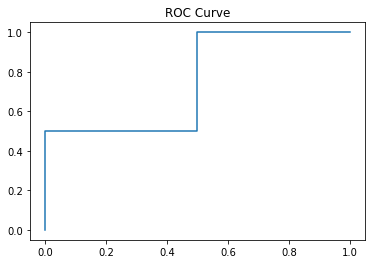

In [26]:
import numpy as np
from sklearn import metrics
from matplotlib import pyplot as plot
from sklearn.metrics import auc


y = np.array([0, 0, 1, 1])
scores = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(y, scores)
AUC = round(auc(fpr, tpr), 4)
print(AUC)
plot.figure("ROC Curve")
plot.title("ROC Curve")
plot.xlabel = ('FPR')
plot.ylabel = ('TPR')
plot.plot(fpr, tpr, label='ROC')
plot.show()


In [18]:
print(fpr)
print(tpr)
print(thresholds)

[0.   0.25 1.  ]
[nan nan nan]
[1.8 0.8 0.1]
